In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\My folder\ostad\module_12\2025-02-13T08-37-53.004Z-2025-01-18T19-25-50.103Z-2024-10-16T17-01-08.286Z-KNN_Assignment\KNN_Assignment\Coded_Data.csv")
df

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
996,997,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
997,998,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
998,999,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


In our dataframe, the first column looks like the index, let's set `index_col = 0`

In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...
995,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
996,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
997,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
998,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


Great, this looks fine now!<br>

Let's overview the data, we can use `info()` here!

In [5]:
#Code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 86.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cd_1    1000 non-null   float64
 1   Cd_2    1000 non-null   float64
 2   Cd_3    1000 non-null   float64
 3   Cd_4    1000 non-null   float64
 4   Cd_5    1000 non-null   float64
 5   Cd_6    1000 non-null   float64
 6   Cd_7    1000 non-null   float64
 7   Cd_8    1000 non-null   float64
 8   Cd_9    1000 non-null   float64
 9   Cd_10   1000 non-null   float64
 10  Result  1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 86.1+ KB


Let's split the data so that we can fit the `scaler` to the features only!

In [7]:
#Code Here
features=df.drop('Result',axis=1)
features

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
1,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
2,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
3,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
4,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9
...,...,...,...,...,...,...,...,...,...,...
995,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2
996,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8
997,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2
998,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7


In [8]:
features

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
1,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
2,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
3,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
4,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9
...,...,...,...,...,...,...,...,...,...,...
995,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2
996,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8
997,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2
998,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7


Let's fit `scaler` to the features now!

In [13]:
#Code here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit(features)
scaled_features

StandardScaler()

StandardScaler()

So, we have the fitted features to the `scaler` object. We will use this `scaler` object to transform all the features using `.transform()` method in `Scikit-learn` to do the `standardization` job by centering and scaling.<br>
Let's pass the features to `scaler.transform()` to get standardized features in `scaled_features`!

In [14]:
scaled_features = scaler.transform(features)

In [15]:
scaled_features

array([[-0.12252539,  0.1875694 , -0.91183199, ..., -1.48006982,
        -0.95256187, -0.64536551],
       [-1.08602779, -0.43340316, -1.02415132, ..., -0.20055606,
        -1.82621843,  0.6351032 ],
       [-0.78865051,  0.33745933,  0.30003449, ...,  0.28776079,
        -0.68275617, -0.3762815 ],
       ...,
       [ 0.64470801, -0.51191693, -0.17880055, ..., -2.36398512,
        -0.81123508,  0.11549271],
       [ 0.46628164, -0.98299956, -1.46751711, ..., -0.03984418,
         0.40289057, -0.85877696],
       [-0.39016495, -0.59756832, -1.43204784, ..., -0.56524838,
         0.33865112,  0.01342636]])

In [13]:
scaled_features.shape

(1000, 10)

`scaled_features` is a NumPy array, Let's convert this into the pandas `DataFrame`!<br>
We can use our `df.columns` to get the columns name and pass that to `DatFrame()` along with `scaled_features`, note we don't need `Results` column, [:-1] will work *(everything but the last one)*!

In [14]:
#Before Scaling
df

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y
...,...,...,...,...,...,...,...,...,...,...,...
995,58.7,56.4,49.5,38.1,62.8,35.2,43.6,17.9,59.3,71.2,Y
996,33.4,52.1,54.7,48.5,85.7,76.2,61.6,40.0,50.8,87.8,N
997,66.0,53.6,45.4,56.1,54.6,53.1,22.6,21.8,48.8,73.2,Y
998,63.0,47.0,23.6,40.7,97.5,56.6,50.0,59.4,67.7,62.7,Y


In [17]:
cols = df.columns[:-1]
cols

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [18]:
#After Scaling
df_scaled_features = pd.DataFrame(data=scaled_features, columns=cols)#df.columns[:-1])
df_scaled_features

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232
...,...,...,...,...,...,...,...,...,...,...
995,0.210537,-0.312064,0.063573,-0.258307,0.015714,-1.394244,-0.848897,-2.605053,-0.136721,-0.070082
996,-1.294192,-0.618981,0.370973,0.482481,1.568822,1.275723,0.360492,-1.239002,-0.682756,1.470191
997,0.644708,-0.511917,-0.178801,1.023827,-0.540420,-0.228575,-2.259851,-2.363985,-0.811235,0.115493
998,0.466282,-0.983000,-1.467517,-0.073110,2.369113,-0.000651,-0.418892,-0.039844,0.402891,-0.858777


<br>Our data is ready for the Machine Learning part now!
## Let's do the train_test split 
I am sure, you are very comfortable with this now!

In [94]:
#Code here
from sklearn.model_selection import train_test_split
X=df_scaled_features
y=df['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [97]:
X_train

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
541,-0.586434,0.044817,0.341415,-1.725638,-0.180968,-1.101199,-0.116545,-0.831041,0.492826,0.310347
440,-0.717280,0.016267,0.294123,-0.265430,1.779068,0.292394,-1.984379,-0.027482,-1.010377,0.597988
482,0.739869,0.672927,0.879366,-0.956358,0.585413,-1.459365,0.568776,0.225949,-1.312303,0.885630
422,1.733109,-1.318467,-0.267474,-0.471996,0.164921,-1.511462,0.125333,-0.250006,0.788327,0.124771
778,-0.455588,1.372414,0.217273,2.598002,0.117446,0.754754,-0.425611,2.086498,-0.721300,0.180444
...,...,...,...,...,...,...,...,...,...,...
106,-1.978160,0.473074,-0.421174,-1.134432,-0.404778,1.353869,-0.620457,-0.243825,-0.869051,-2.000064
270,0.222432,0.687202,-0.344324,-0.678562,-0.872745,-1.055614,0.703152,-0.509617,1.122372,0.495922
860,-1.026552,1.243937,0.359150,0.218931,1.840107,-0.104845,0.326898,0.133230,-1.511445,0.829957
435,0.888557,0.801404,-0.799513,0.033734,-0.411560,-1.042590,-1.204995,0.071418,-1.350846,0.932023


In [66]:
X_train

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
926,0.805292,-0.040834,0.571966,1.372852,-2.249517,0.800339,0.326898,-2.234179,1.270123,-0.617529
411,-0.015470,0.737166,0.323681,-0.094479,-0.242007,0.689633,0.508306,-0.206737,-0.181688,2.463019
224,-1.181189,1.258212,0.861631,1.159163,0.266653,0.839412,0.568776,-0.756866,0.229444,1.776391
14,-0.515063,-0.690357,-0.468466,1.266007,-0.743884,1.952984,0.904717,1.969054,-0.136721,0.310347
170,-0.580486,-0.347752,-0.001454,0.047980,-0.438689,1.822741,-1.702189,0.287761,0.524946,0.969139
...,...,...,...,...,...,...,...,...,...,...
952,0.817187,-0.012284,-1.745360,0.931228,-0.079236,0.311930,1.475818,-0.540523,-0.631365,1.173271
643,-1.300139,1.029808,-0.166977,-1.348121,0.110664,0.057958,0.555338,0.936790,-0.862627,-0.292773
249,0.264065,1.008395,-1.006417,1.429836,0.178485,-1.179344,0.770341,0.312486,-1.742707,1.071205
664,1.174040,-0.733183,-1.573925,0.261669,0.734620,-0.619302,0.595651,0.646272,1.000317,-0.404118


In [98]:
y_train

541    Y
440    N
482    N
422    Y
778    N
      ..
106    N
270    Y
860    N
435    Y
102    Y
Name: Result, Length: 700, dtype: object

In [20]:
y_train

505    N
547    Y
75     N
960    N
557    N
      ..
844    Y
424    N
574    Y
154    N
947    Y
Name: Result, Length: 700, dtype: object

In [99]:
X_test

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
521,-0.842178,1.586542,1.015331,-1.212785,-0.553985,-0.111357,0.420962,0.497922,-0.406527,0.403134
737,1.382204,0.415973,-0.438908,0.575080,-1.489919,-1.062126,-0.848897,-1.838581,0.929654,-0.933007
740,1.269200,0.130468,0.719754,0.959720,-0.364085,0.644048,-2.548761,-0.905216,-0.419374,1.089762
660,0.912348,-0.433403,-1.313817,1.038073,-0.940566,-1.081662,-1.809690,0.572097,0.312955,-0.014410
411,-0.015470,0.737166,0.323681,-0.094479,-0.242007,0.689633,0.508306,-0.206737,-0.181688,2.463019
...,...,...,...,...,...,...,...,...,...,...
468,-0.681595,-1.518321,0.087219,-0.165709,-0.676063,-0.423939,-1.278902,-2.431979,0.640577,-1.053631
935,0.038058,-0.419128,-1.041886,-0.664316,-1.279673,-0.860250,-0.129982,-0.849585,0.839719,0.430971
428,-0.842178,0.837092,0.057661,0.981089,-0.228442,0.670097,2.261921,0.683359,-0.027514,1.219665
7,-0.461535,-0.097935,0.211361,-1.910835,-0.364085,0.396588,0.716590,0.936790,0.229444,0.310347


In [21]:
X_test

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
305,-2.174429,-1.175715,1.559193,0.404129,-0.275917,0.364027,1.428786,1.276757,-0.914018,-2.890825
826,0.870715,-2.203532,-0.663547,1.693385,-2.358031,-1.485414,-0.721239,-0.231462,-0.804811,-0.367003
442,0.335436,-0.419128,0.116777,-1.312506,-1.591651,-1.205393,-1.675313,-0.138744,0.647000,-1.823768
990,-0.253371,-0.668944,0.778870,3.467004,-0.879527,2.070202,1.348160,0.782259,-2.166688,-0.376282
312,0.870715,0.637239,-1.242878,1.465451,-0.242007,-1.309586,2.671769,-0.076932,-0.008242,-1.378387
...,...,...,...,...,...,...,...,...,...,...
33,0.394911,0.979845,0.690196,0.197563,0.253089,0.377052,-0.902648,0.306304,1.629864,0.783563
232,-1.222821,1.379551,0.826162,-1.006219,-1.320365,0.409612,1.455661,-0.089294,-0.175264,-0.237100
933,0.329488,-0.354889,-0.852717,0.731785,-1.116902,0.735218,0.461275,-1.863306,1.822582,-1.016516
71,-0.306899,1.586542,0.400531,-1.127309,-1.829025,-0.547669,0.521744,-0.577611,0.248716,-0.302051


In [100]:
y_test

521    N
737    Y
740    Y
660    Y
411    N
      ..
468    Y
935    Y
428    N
7      N
155    N
Name: Result, Length: 300, dtype: object

In [ ]:
y_test

## KNN
Our focus is to come up with a model that can predict the class in `Result` for the new data point. We don't know what k number will work best, let's start with k = 1 at the moment. <br>
We need to import the `KNeighborsClassifier` from `sklearn.neighbors`.

In [101]:
#Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', p=1)
knn.fit(X_train, y_train)
predictionsKNN = knn.predict(X_test)

print('Classification Report:\n', classification_report(y_test, predictionsKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsKNN))
print('Accuracy Score:', accuracy_score(y_test, predictionsKNN))

Classification Report:
               precision    recall  f1-score   support

           N       0.90      0.92      0.91       142
           Y       0.93      0.91      0.92       158

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix:
 [[131  11]
 [ 14 144]]
Accuracy Score: 0.9166666666666666


In [104]:
#Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', p=1)
knn.fit(X_train, y_train)
predictionsKNN = knn.predict(X_test)

print('Classification Report:\n', classification_report(y_test, predictionsKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsKNN))
print('Accuracy Score:', accuracy_score(y_test, predictionsKNN))

Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.94      0.93       142
           Y       0.94      0.94      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix:
 [[133   9]
 [ 10 148]]
Accuracy Score: 0.9366666666666666


In [58]:
#Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=1)
knn.fit(X_train, y_train)
predictionsKNN = knn.predict(X_test)

print('Classification Report:\n', classification_report(y_test, predictionsKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsKNN))
print('Accuracy Score:', accuracy_score(y_test, predictionsKNN))

Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.91      0.92       148
           Y       0.91      0.93      0.92       152

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix:
 [[134  14]
 [ 10 142]]
Accuracy Score: 0.92


KNeighborsClassifier(n_neighbors=3)

Let's show the score now!

In [117]:
knn.score(X_test,y_test)

0.95

In [107]:
#Code here
from sklearn.model_selection import cross_val_score
k_list = list(range(1, 60, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
MSE = [1 - x for x in cv_scores]
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}.")

The optimal number of neighbors is 23.


In [108]:
#Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=23, metric='manhattan', p=1)
knn.fit(X_train, y_train)
predictionsKNN = knn.predict(X_test)

print('Classification Report:\n', classification_report(y_test, predictionsKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsKNN))
print('Accuracy Score:', accuracy_score(y_test, predictionsKNN))

Classification Report:
               precision    recall  f1-score   support

           N       0.94      0.96      0.95       142
           Y       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Confusion Matrix:
 [[136   6]
 [  9 149]]
Accuracy Score: 0.95


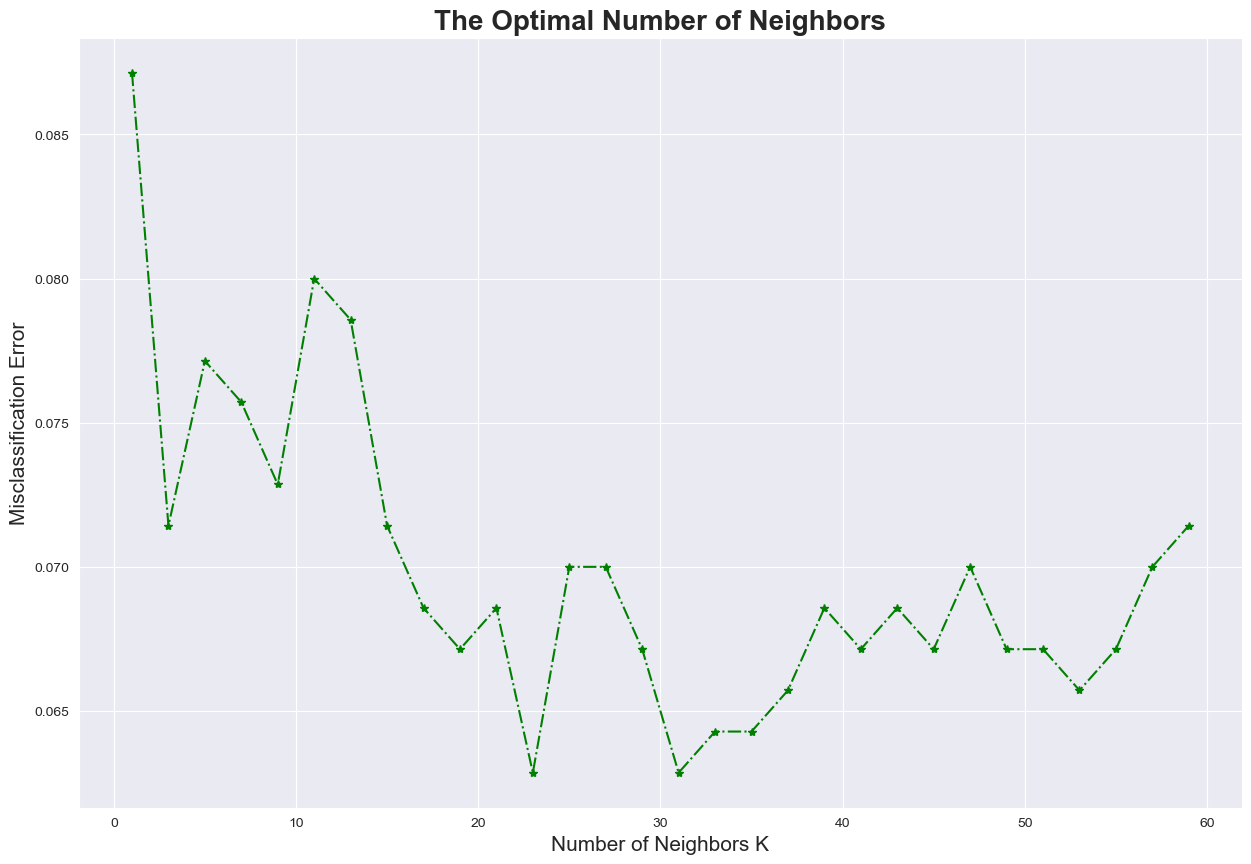

In [114]:
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.title('The Optimal Number of Neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("darkgrid")
plt.plot(k_list, MSE, marker='*', linestyle='-.', color='g')